In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: murali5695
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri


100%|██████████| 86.8M/86.8M [00:00<00:00, 143MB/s]


In [ ]:
import numpy as np
import pandas as pd

import os

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Creating the Pathway

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/brain-tumor-classification-mri/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/brain-tumor-classification-mri/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train, random_state = 101)
X_train.shape

(3264, 150, 150, 3)

Assembling the Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 101)

Encoding dependent varaible

In [ ]:
Y_train_new = []
for i in Y_train:
    Y_train_new.append(labels.index(i))
Y_train=Y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)

Y_test_new = []
for i in Y_test:
    Y_test_new.append(labels.index(i))
Y_test=Y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)



In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.35))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.35))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.35))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.35))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(524, activation = 'relu'))
model.add(Dense(524, activation = 'relu'))
model.add(Dropout(0.35))
model.add(Dense(4, activation = 'softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 524)                 │       3,354,124 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 524)                 │         275,100 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,536,348 (17.30 MB)

 Trainable params: 4,536,348 (17.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,epochs=50, validation_split = 0.1)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 294ms/step - accuracy: 0.2754 - loss: 4.6989 - val_accuracy: 0.2863 - val_loss: 1.3694
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.3071 - loss: 1.3548 - val_accuracy: 0.2901 - val_loss: 1.3720
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.3562 - loss: 1.3165 - val_accuracy: 0.2710 - val_loss: 1.4252
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.4161 - loss: 1.2232 - val_accuracy: 0.3206 - val_loss: 1.5016
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.5802 - loss: 0.9822 - val_accuracy: 0.4695 - val_loss: 1.3347
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.5988 - loss: 0.9174 - val_accuracy: 0.4504 - val_loss: 1.1943
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.6278 - loss: 0.8672 - val_accuracy: 0.4885 - val_loss: 1.1946
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.6781 - loss: 0.7582 - val_accuracy: 0.484

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Accuracy: 0.8790199081163859
F1-score: 0.8763501664087818
Precision: 0.8894828536584072
Recall: 0.8790199081163859
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       168
           1       0.95      0.70      0.81       200
           2       0.89      0.94      0.92       109
           3       0.93      0.99      0.96       176

    accuracy                           0.88       653
   macro avg       0.89      0.89      0.88       653
weighted avg       0.89      0.88      0.88       653



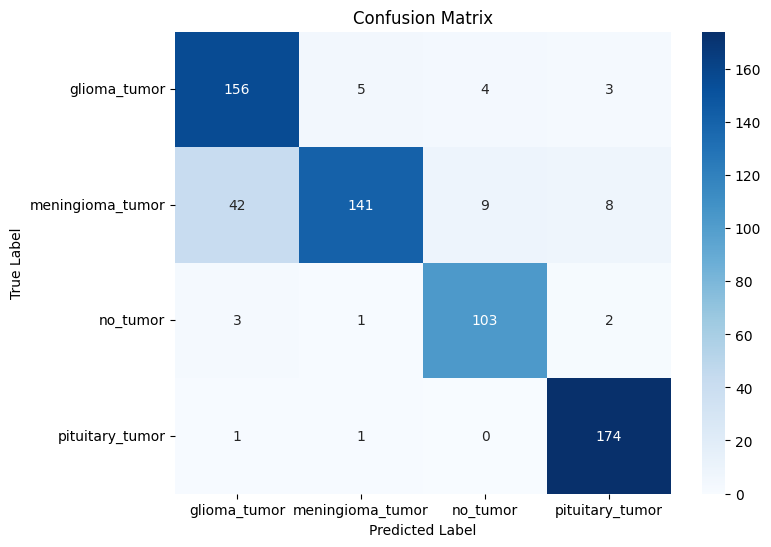

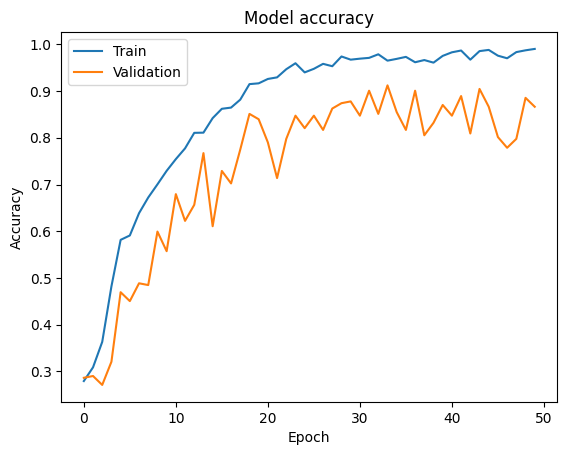

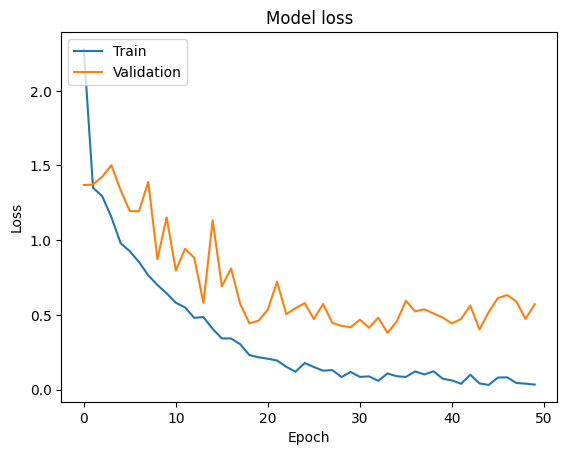

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import seaborn as sns

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_test, axis=1)

accuracy = accuracy_score(Y_true_classes, Y_pred_classes)
f1 = f1_score(Y_true_classes, Y_pred_classes, average='weighted')
precision = precision_score(Y_true_classes, Y_pred_classes, average='weighted')
recall = recall_score(Y_true_classes, Y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

print(classification_report(Y_true_classes, Y_pred_classes))


# Plot the confusion matrix
cm = confusion_matrix(Y_true_classes, Y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




In [ ]:
# prompt: save model

model.save('/content/drive/MyDrive/1000/cnn_model98accuarcy.h5')


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.8875 - loss: 0.5436
Test Loss: 0.4646
Test Accuracy: 0.8913
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
F1 Score: 0.8912


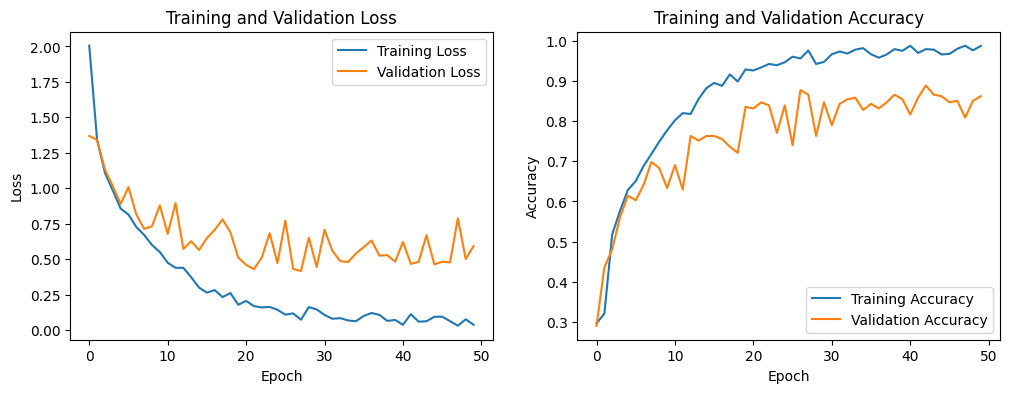

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict the classes for the test set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_test, axis=1)

# Calculate the F1 score
f1 = f1_score(Y_true_classes, Y_pred_classes, average='weighted')
print(f"F1 Score: {f1:.4f}")


# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import numpy as np
def predict_tumor_type(image_path):
  """Predicts the type of tumor in a given MRI image.

  Args:
    image_path: The path to the MRI image.

  Returns:
    A string representing the predicted tumor type (or 'no tumor').
  """
  img = cv2.imread(image_path)
  img = cv2.resize(img, (150, 150))
  img = np.expand_dims(img, axis=0) 

  prediction = model.predict(img)
  predicted_class = np.argmax(prediction)

  tumor_types = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
  predicted_tumor_type = tumor_types[predicted_class]

  return predicted_tumor_type

# Example usage:
image_path = '/content/brain-tumor-classification-mri/Testing/glioma_tumor/image(14).jpg'
predicted_type = predict_tumor_type(image_path)
print(f"The predicted tumor type is: {predicted_type}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The predicted tumor type is: glioma_tumor


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

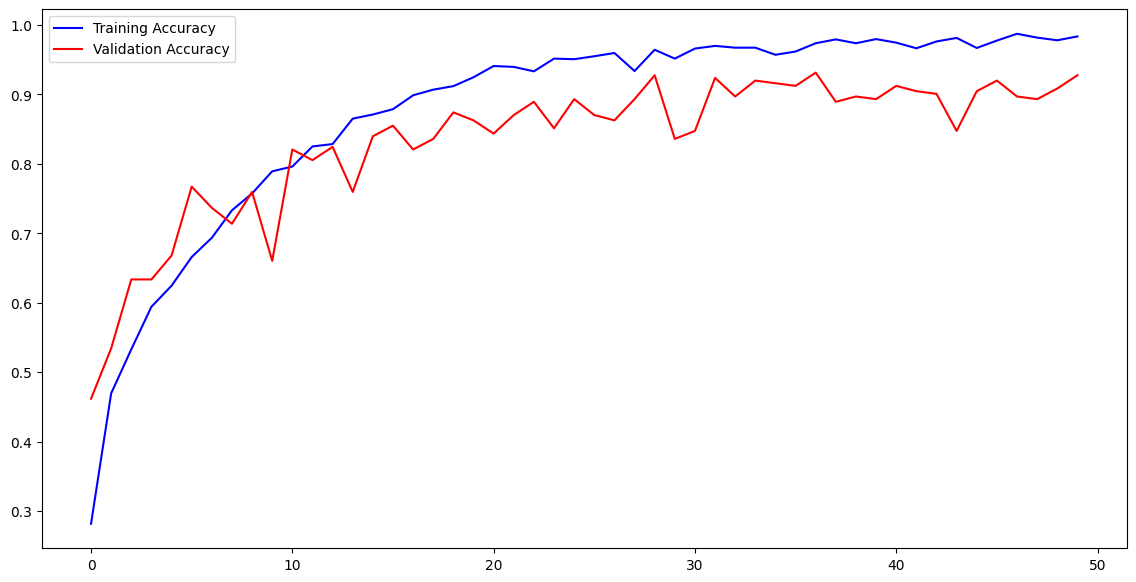

In [ ]:
model.save('braintumor.h5')

acc = history.history['accuracy']
epochs = range(len(acc))
val_acc = history.history['val_accuracy']

fig = plt.figure(figsize = (14, 7))
plt.plot(epochs,acc,color = 'blue', label = 'Training Accuracy')
plt.plot(epochs,val_acc,'r',label = 'Validation Accuracy')
plt.legend(loc = 'upper left')
plt.show()


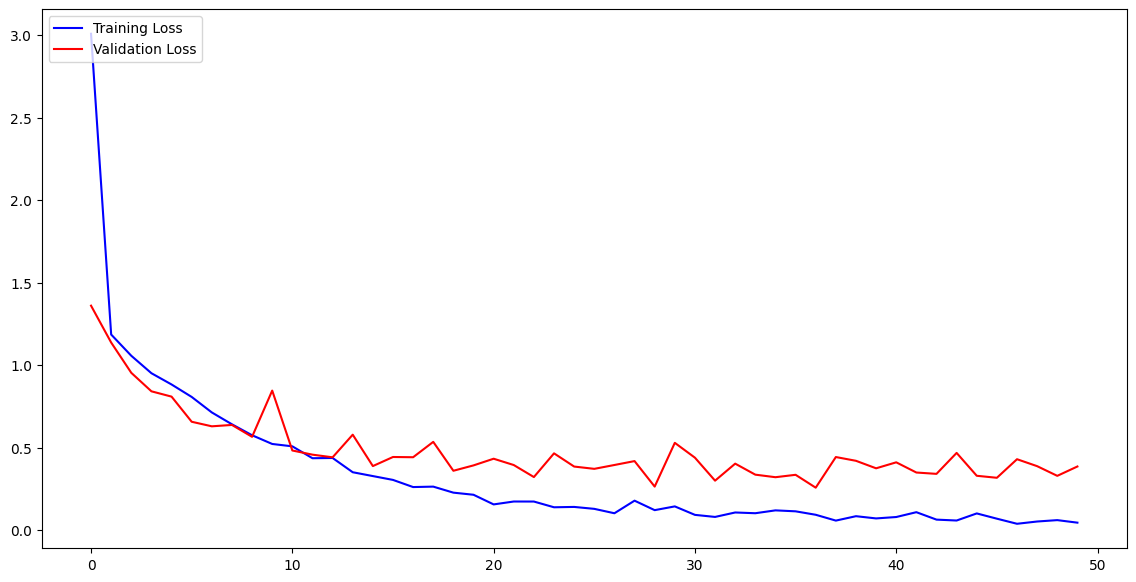

In [ ]:
loss = history.history['loss']
epochs = range(len(acc))
val_loss = history.history['val_loss']

fig = plt.figure(figsize = (14, 7))
plt.plot(epochs,loss,color = 'blue', label = 'Training Loss')
plt.plot(epochs,val_loss,'r',label = 'Validation Loss')
plt.legend(loc = 'upper left')
plt.show()

Predicting results

In [ ]:
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(126).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

(1, 150, 150, 3)

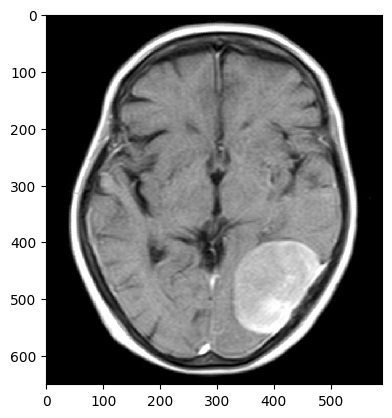

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(126).jpg')
plt.imshow(img,interpolation = 'nearest')
plt.show()

In [ ]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


1